<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session12/S12-AssignmentA/FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install the required libraries**

In [20]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%reload_ext autoreload
%autoreload 2

Mounted at /content/gdrive


In [28]:

import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/eva5/Session12/S12-AssignmentA/PyTNet'
sys.path.append(folder)
folder1 = '/content/gdrive/My Drive/Colab Notebooks/eva5/Session12/S12-AssignmentA/PyTNet/models'
sys.path.append(folder1)
folder2 = '/content/gdrive/My Drive/Colab Notebooks/eva5/Session12/S12-AssignmentA/PyTNet/Training'
sys.path.append(folder2)
folder3 = '/content/gdrive/My Drive/Colab Notebooks/eva5/Session12/S12-AssignmentA/PyTNet/Dataset'
sys.path.append(folder3)

## **Importing Required files**

In [25]:
!pip install tinyimagenet

ERROR: Could not find a version that satisfies the requirement tinyimagenet (from versions: none)
ERROR: No matching distribution found for tinyimagenet


In [29]:
import torch
import train_test_loader
import show_images
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
from GradCam import GradCAM,visualize_cam
from LR_Range_Test import LR_test
from tinyimagenet import TinyImageNetDataSet
from Models import ResnetModel

## **Load Data , spit and apply transforms**

In [30]:
import albumentations as A
import cv2
channel_means = (0.442,0.442,0.442)
channel_stdevs = (0.278, 0.278, 0.278)
train_transform = AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.Rotate(limit=30, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

## **DataLoader**

In [31]:
trainloader, testloader = train_test_loader.load(train_dataset,test_dataset,batch_size=256)

## **Print the summary**

In [32]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResnetModel.ResNet18(num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

## **Initialise Optimiser,Scheduler, Criterion**

In [33]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR,StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.0001,nesterov = True ) 
criterion = nn.CrossEntropyLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.02, total_steps=None, epochs=30, steps_per_epoch=len(trainloader), pct_start=1/3, anneal_strategy='linear', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =10)


## **Train Model**

In [34]:

train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,30,scheduler,batch_scheduler=True,best_acc = 0,path = "newtinymodel.pt")

EPOCH: 1 LR: 0.002




Test set: Average loss: 0.0169, Accuracy: 3004/33000 (9.10%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0038005982053838485




Test set: Average loss: 0.0153, Accuracy: 4958/33000 (15.02%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.005601196410767697




Test set: Average loss: 0.0141, Accuracy: 6357/33000 (19.26%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.007401794616151546




Test set: Average loss: 0.0132, Accuracy: 7942/33000 (24.07%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.009202392821535395




Test set: Average loss: 0.0119, Accuracy: 9745/33000 (29.53%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.011002991026919245




Test set: Average loss: 0.0118, Accuracy: 9813/33000 (29.74%)

accuracy increased, Saving model....
EPOCH: 7 LR: 0.012803589232303092




Test set: Average loss: 0.0121, Accuracy: 9737/33000 (29.51%)

EPOCH: 8 LR: 0.01460418743768694




Test set: Average loss: 0.0123, Accuracy: 10040/33000 (30.42%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.01640478564307079




Test set: Average loss: 0.0115, Accuracy: 10820/33000 (32.79%)

accuracy increased, Saving model....
EPOCH: 10 LR: 0.01820538384845464




Test set: Average loss: 0.0124, Accuracy: 10240/33000 (31.03%)

EPOCH: 11 LR: 0.01999671096345515




Test set: Average loss: 0.0112, Accuracy: 11503/33000 (34.86%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.01900671096345515




Test set: Average loss: 0.0106, Accuracy: 12122/33000 (36.73%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.01801671096345515




Test set: Average loss: 0.0100, Accuracy: 13490/33000 (40.88%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.01702671096345515




Test set: Average loss: 0.0104, Accuracy: 12797/33000 (38.78%)

EPOCH: 15 LR: 0.01603671096345515




Test set: Average loss: 0.0096, Accuracy: 13987/33000 (42.38%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.01504671096345515




Test set: Average loss: 0.0094, Accuracy: 14326/33000 (43.41%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.014056710963455149




Test set: Average loss: 0.0089, Accuracy: 15053/33000 (45.62%)

accuracy increased, Saving model....
EPOCH: 18 LR: 0.01306671096345515




Test set: Average loss: 0.0086, Accuracy: 15387/33000 (46.63%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.012076710963455148




Test set: Average loss: 0.0086, Accuracy: 15746/33000 (47.72%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.011086710963455149




Test set: Average loss: 0.0088, Accuracy: 15580/33000 (47.21%)

EPOCH: 21 LR: 0.010096710963455147




Test set: Average loss: 0.0084, Accuracy: 16207/33000 (49.11%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.00910671096345515




Test set: Average loss: 0.0082, Accuracy: 16551/33000 (50.15%)

accuracy increased, Saving model....
EPOCH: 23 LR: 0.008116710963455148




Test set: Average loss: 0.0082, Accuracy: 16698/33000 (50.60%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.00712671096345515




Test set: Average loss: 0.0079, Accuracy: 17183/33000 (52.07%)

accuracy increased, Saving model....
EPOCH: 25 LR: 0.006136710963455149




Test set: Average loss: 0.0078, Accuracy: 17321/33000 (52.49%)

accuracy increased, Saving model....
EPOCH: 26 LR: 0.005146710963455148




Test set: Average loss: 0.0076, Accuracy: 17654/33000 (53.50%)

accuracy increased, Saving model....
EPOCH: 27 LR: 0.00415671096345515




Test set: Average loss: 0.0075, Accuracy: 17883/33000 (54.19%)

accuracy increased, Saving model....
EPOCH: 28 LR: 0.0031667109634551487




Test set: Average loss: 0.0072, Accuracy: 18394/33000 (55.74%)

accuracy increased, Saving model....
EPOCH: 29 LR: 0.002176710963455151




Test set: Average loss: 0.0070, Accuracy: 18738/33000 (56.78%)

accuracy increased, Saving model....
EPOCH: 30 LR: 0.0011867109634551495




Test set: Average loss: 0.0068, Accuracy: 19056/33000 (57.75%)

accuracy increased, Saving model....


In [35]:
Lr = train_test.LR

## **PLot LR Curve**

No handles with labels found to put in legend.


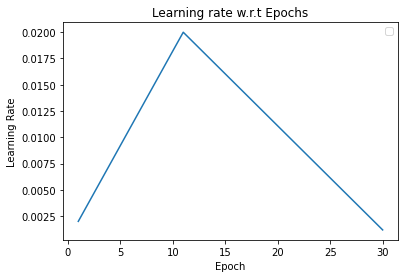

In [36]:
import numpy as np
curves = [{"x":np.arange(1,31), "y": Lr, "label": "","xlabel": "Epoch", "ylabel":"Learning Rate"}]
evaluate.plot_curve(curves,"Learning rate w.r.t Epochs",Figsize = (6,4))

## **Accuracy Curve**

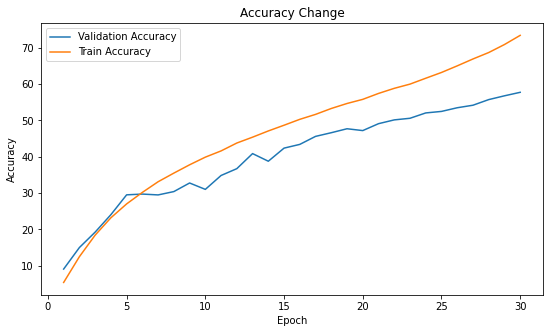

In [37]:

curves = [{"x":np.arange(1,31),"y":train_test.test_acc , "label": "Validation Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
          {"x":np.arange(1,31),"y":train_test.train_acc , "label": "Train Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
]
evaluate.plot_curve(curves,"Accuracy Change",Figsize = (9,5))

## **Get the words format of Classes**

In [38]:
url = "tiny-imagenet-200/words.txt"
f = open(url, "r")
words = [None] * 200
for line in f:
  wordclass = line.strip('\n').split('\t')[0]

  if wordclass in classes:
    i = classes.index(line.strip('\n').split('\t')[0])
    words[i] = line.strip('\n').split('\t')[1]


## **GradCam On All 4 Layers**

In [39]:
from GradCam import GradCamView
layers = [model.layer1, model.layer2, model.layer3, model.layer4]
miscalssified_images = evaluate.show_misclassified_images(model, device, testloader, words)
GradCamView(miscalssified_images,model,words,layers,Figsize = (23,30),subplotx1 = 13, subplotx2 = 2)

Output hidden; open in https://colab.research.google.com to view.